<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project5:-Customer-segmentation-of-e-commerce-website" data-toc-modified-id="Project5:-Customer-segmentation-of-e-commerce-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project5: Customer segmentation of e-commerce website</a></span></li><li><span><a href="#Preprocessing-&amp;-Viz" data-toc-modified-id="Preprocessing-&amp;-Viz-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing &amp; Viz</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Visualisation-T-SNE" data-toc-modified-id="Visualisation-T-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualisation T-SNE</a></span></li><li><span><a href="#Visualisation-PCA" data-toc-modified-id="Visualisation-PCA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisation PCA</a></span></li><li><span><a href="#Visualisation-UMAP" data-toc-modified-id="Visualisation-UMAP-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualisation UMAP</a></span></li><li><span><a href="#Comparing-visualisation" data-toc-modified-id="Comparing-visualisation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparing visualisation</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#CAH" data-toc-modified-id="CAH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CAH</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-means</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#Cluster-interpretation" data-toc-modified-id="Cluster-interpretation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster interpretation</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#RFM" data-toc-modified-id="RFM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RFM</a></span><ul class="toc-item"><li><span><a href="#Scoring" data-toc-modified-id="Scoring-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scoring</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Cluster-stability-throughout-time" data-toc-modified-id="Cluster-stability-throughout-time-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cluster stability throughout time</a></span><ul class="toc-item"><li><span><a href="#Study-of-dataset-for-the-six-first-months-of-2017-and-2018" data-toc-modified-id="Study-of-dataset-for-the-six-first-months-of-2017-and-2018-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Study of dataset for the six first months of 2017 and 2018</a></span></li><li><span><a href="#Clusters-interpretation-for-2017" data-toc-modified-id="Clusters-interpretation-for-2017-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Clusters interpretation for 2017</a></span></li><li><span><a href="#Clusters-interpretation-for-2018" data-toc-modified-id="Clusters-interpretation-for-2018-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Clusters interpretation for 2018</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Project5: Customer segmentation of e-commerce website
***
The objective of this project is to determine different type of Olists' users using unsupervized algorithms.

This project will be divided into two notebooks:  
- One for the data analysis,
- One dedicated to the customer segmentation.  

The following notebook is dedicated to the clustering.

The data set can be found here: https://www.kaggle.com/olistbr/brazilian-ecommerce

**Packages and DF imported**

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics, manifold
from sklearn import model_selection, preprocessing

from sklearn import manifold, cluster
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN

# Graphical libraries
# %pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import umap
import warnings

In [2]:
df = pd.read_csv('data/cleaned_dataframe.csv')

#Remove column with all 0 values and date of purchase, since we have month and year features
df.drop(columns=['payment_type_not_defined','order_purchase_timestamp'],inplace=True)

In [3]:
#Get 2016, 2017 & 2018  for seasonality study
df_16 = df[df.year==2016]
df_17 = df[df.year==2017]
df_18 = df[df.year==2018]

In [4]:
#Shape of our data set
df.shape

(105785, 42)

## Preprocessing & Viz

### Preprocessing

Due to the high complexity for most clustering algorithms, we will only take a sample of the original dataframe. Plus we will standardize our features, so that each will have the same weight.

In [5]:
#Random sample
N = 10000
X = df.sample(N, random_state=42).copy()
X.shape

(10000, 42)

In [6]:
#Scaling
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

(10000, 42)

We will now study different ways of visualizing the dataset, with a PCA, focus on the global structure and TSNE and Umap, focus on keeping the local structure.

### Visualisation T-SNE

In [7]:
#T-sne 
tsne = manifold.TSNE(n_components=2, perplexity=35, n_iter=500, init='pca',random_state=42)
X_tsne = tsne.fit_transform(X_std)

X['tsne-2d-one'] = X_tsne[:,0]
X['tsne-2d-two'] = X_tsne[:,1]

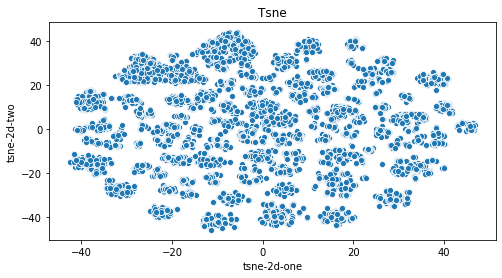

In [8]:
#Visualisation Tsne
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    ax=ax
)
ax.set_title('Tsne')
plt.show()

### Visualisation PCA

In [9]:
#Test of a PCA
#Get the same result
pca = PCA(n_components=6,random_state=42)
pca_result = pca.fit_transform(X_std)
X['pca-one'] = pca_result[:,0]
X['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06956646 0.05713048 0.04951669 0.04749699 0.04376844 0.03978442]


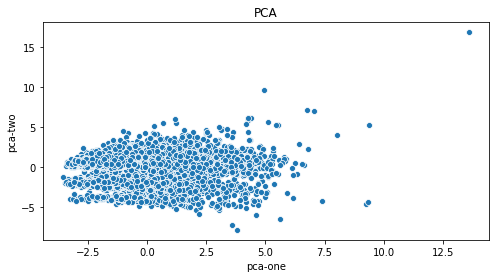

In [10]:
#Visualisation PCA
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=X,
    legend="full",
    ax=ax
)
ax.set_title('PCA')
plt.show()

### Visualisation UMAP

In [11]:
#Remove warning
warnings.filterwarnings("ignore")

#Two components
reducer = umap.UMAP(n_components=2, random_state=42,n_neighbors=30, min_dist=0)
embedding = reducer.fit_transform(X_std)

X['umap-one'] = embedding[:, 0]
X['umap-two'] = embedding[:, 1]

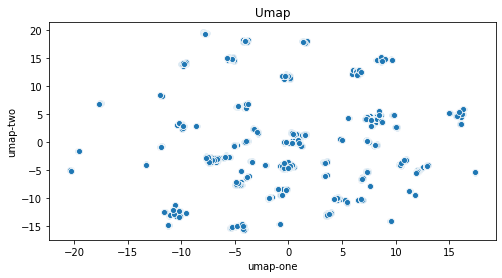

In [12]:
#Visualisation Umap
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="umap-one", y="umap-two",
    data=X,
    legend="full",
    ax=ax
)
ax.set_title('Umap')
plt.show()

### Comparing visualisation

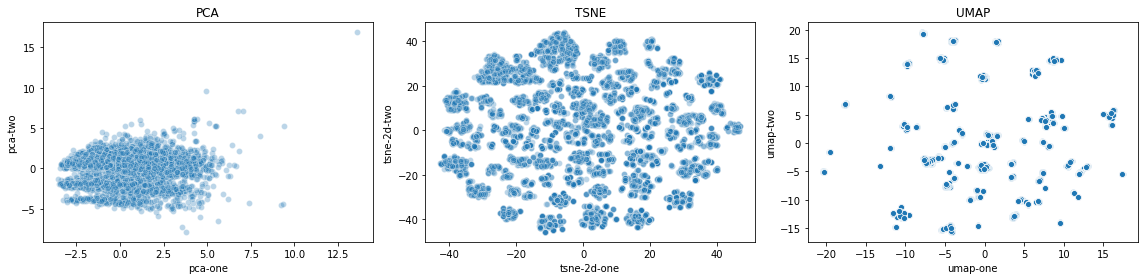

In [13]:
# Compare pca, Umap & tsne
plt.figure(figsize=(16,4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=X,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.set_title('PCA')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax2.set_title('TSNE')


ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x='umap-one', y='umap-two',
    data=X,
    ax=ax3
)
ax3.set_title('UMAP')

plt.tight_layout()

## Clustering

### CAH

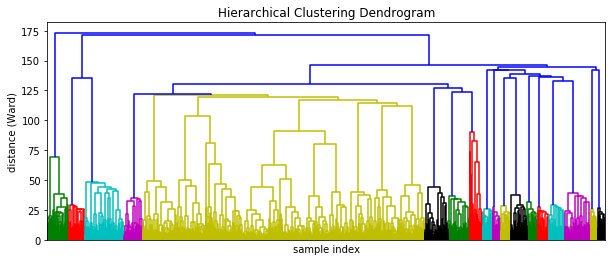

In [14]:
# Calculate the distance between each sample
Z = hierarchy.linkage(X_std, 'ward')

# Make the dendrogram
plt.figure(figsize=(10,4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.xticks([])
plt.show()

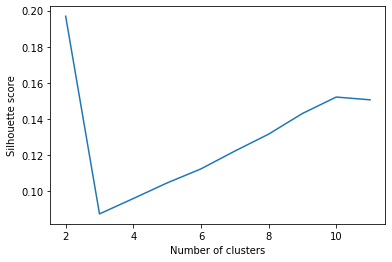

In [15]:
#CAH study
silhouettes = []
for num_cluster in range(2, 12):
    cls = AgglomerativeClustering(n_clusters=num_cluster)
    cls.fit(X_std)
    silh = metrics.silhouette_score(X_std, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,12),silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [16]:
clustering = AgglomerativeClustering(n_clusters=8)
clustering.fit(X_std)
X['cluster_agg'] = clustering.labels_

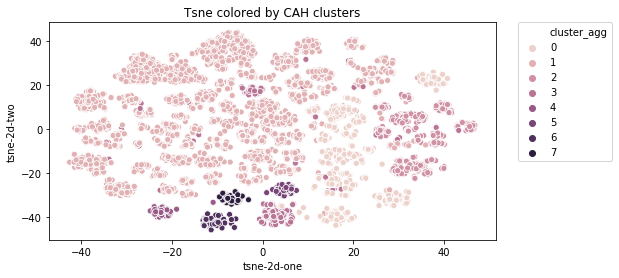

In [17]:
#Visualisation Tsne
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    hue="cluster_agg",
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Tsne colored by CAH clusters')
plt.show()

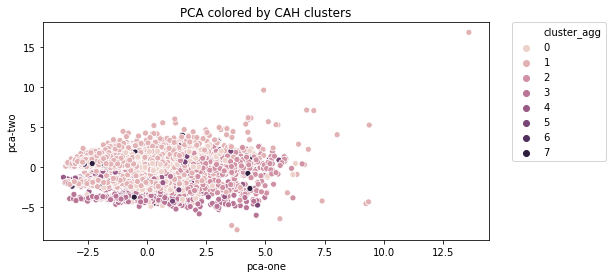

In [18]:
#Visualisation PCA
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=X,
    legend="full",
    hue="cluster_agg",
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('PCA colored by CAH clusters')
plt.show()

### K-means

The number of ideal cluster would be 6 here.

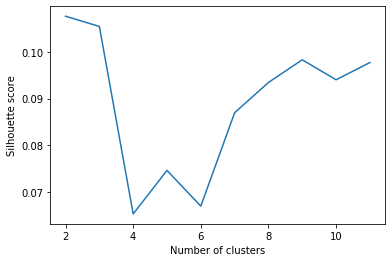

In [19]:
#K means study
silhouettes = []
for num_cluster in range(2, 12):
    cls = cluster.KMeans(n_clusters=num_cluster, n_init=10,init='k-means++')
    cls.fit(X_std)
    silh = metrics.silhouette_score(X_std, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,12),silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [20]:
#Get better cluster number
km = cluster.KMeans(n_clusters=7)
km.fit(X_std)
X['cluster'] = km.labels_

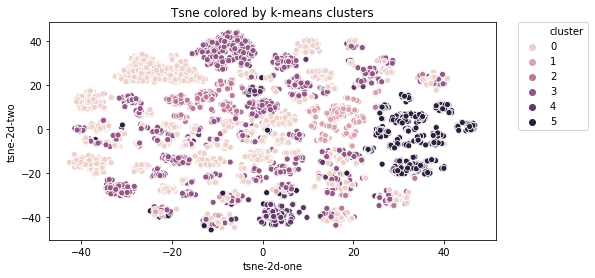

In [21]:
#Visualisation Tsne
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    hue="cluster",
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Tsne colored by k-means clusters')
plt.show()

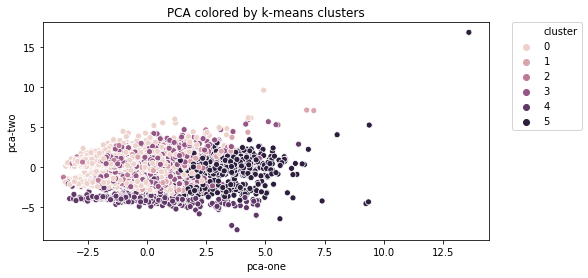

In [22]:
#Visualisation PCA
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=X,
    legend="full",
    hue="cluster",
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('PCA colored by k-means clusters')
plt.show()

### DBSCAN

The DBSCAN is not appropriate for this dataset. As we can see, when we change the epsilon, the number of cluster goes from over a hundred to only one of two.

In [23]:
# for i in [x / 2.0 for x in range(1, 20, 2)]:
#     clustering = DBSCAN(eps=i).fit(X_std)
#     X['cluster_dbs'] = clustering.labels_
#     print(f"Number of clusters: {X['cluster_dbs'].nunique()}, silhouette score={metrics.silhouette_score(X_std, clustering.labels_)} for epsilon = {i}")

Number of clusters: 19, silhouette score=-0.3624764251171364 for epsilon = 0.5  
Number of clusters: 118, silhouette score=-0.1554970308221382 for epsilon = 1.5  
Number of clusters: 171, silhouette score=0.14592295285618037 for epsilon = 2.5  
Number of clusters: 152, silhouette score=0.17588135951412512 for epsilon = 3.5  
Number of clusters: 60, silhouette score=0.12504909974590817 for epsilon = 4.5  
Number of clusters: 28, silhouette score=0.17462063054035906 for epsilon = 5.5  
Number of clusters: 11, silhouette score=0.23684037150348208 for epsilon = 6.5  
Number of clusters: 8, silhouette score=0.24428816556929533 for epsilon = 7.5  
Number of clusters: 5, silhouette score=0.29248746075329485 for epsilon = 8.5  
Number of clusters: 2, silhouette score=0.6968529544560883 for epsilon = 9.5  

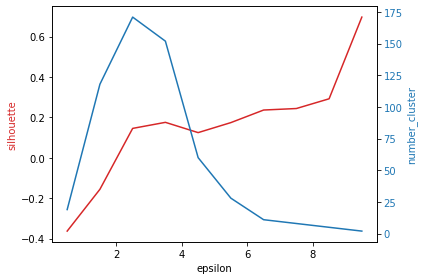

In [24]:
#Plot result from dbscan
result = [19, -0.3624764251171364,0.5,
118, -0.1554970308221382,1.5,
171, 0.14592295285618037,2.5,
152, 0.17588135951412512,3.5,
60, 0.12504909974590817,4.5,
28, 0.17462063054035906,5.5,
11, 0.23684037150348208,6.5,
8, 0.24428816556929533,7.5,
5, 0.29248746075329485,8.5,
2, 0.6968529544560883,9.5]

#Transform into DF
epsilon = []
sil = []
nb_cluster = []
for i,v in enumerate(result):
    if i%3 == 0:
        nb_cluster.append(v)
    if i%3 == 1:
        sil.append(v)
    if i%3 == 2:
        epsilon.append(v)    

#Result DBSCAN
d = {'epsilon':epsilon,'silhouette':sil,"number_cluster":nb_cluster}
df_dbs = pd.DataFrame(data=d)

#Plot number of cluster and silhouette score based on epsilon
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('silhouette', color=color)
ax1.plot(df_dbs['epsilon'], df_dbs['silhouette'], color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('number_cluster', color=color)  # we already handled the x-label with ax1
ax2.plot(df_dbs['epsilon'], df_dbs['number_cluster'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [25]:
# for i in [x for x in range(3, 12, 4)]:
#     clustering = DBSCAN(min_samples=i).fit(X_std)
#     X['cluster_dbs'] = clustering.labels_
#     print(f"Number of clusters: {X['cluster_dbs'].nunique()}, silhouette score={metrics.silhouette_score(X_std, clustering.labels_)} for min_sample = {i}")

Number of clusters: 75, silhouette score=-0.41613200126790106 for min_sample = 3  
Number of clusters: 10, silhouette score=-0.3223622712882616 for min_sample = 6  
Number of clusters: 2, silhouette score=-0.22242711878470928 for min_sample = 9  

In [26]:
clustering = DBSCAN(eps=8,min_samples=5).fit(X_std)
X['cluster_dbs'] = clustering.labels_

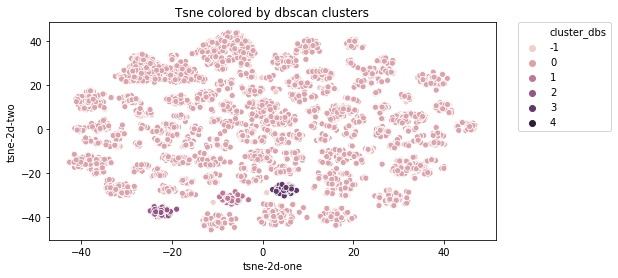

In [27]:
#Visualisation TSNE & DBScan
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    hue="cluster_dbs",
    ax=ax
)
ax.set_title('Tsne colored by dbscan clusters')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

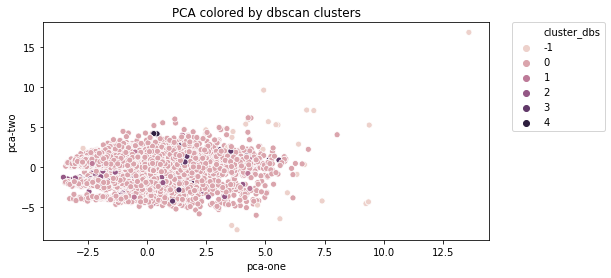

In [28]:
#Visualisation PCA
plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=X,
    legend="full",
    hue="cluster_dbs",
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('PCA colored by dbscan clusters')
plt.show()

## Cluster interpretation

Now that we have our clusters, the objective is to understand what are the common caracteristics between the customers.

### Univariate analysis

**Categorical features**

In [29]:
location = ['customer_state_DF', 'customer_state_ES', 'customer_state_GO',
'customer_state_MG', 'customer_state_PR', 'customer_state_RJ',
'customer_state_RS', 'customer_state_SC', 'customer_state_SP',
'customer_state_other']

#Product category
df1 = pd.DataFrame(data=np.array([i for i in range(0,X['cluster'].nunique())]),columns=['cluster'])
#Get the location distribution within the different cluster
for i in location:
    df1[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/X.groupby('cluster')[i].sum().sum()
#     df1[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/N

df1.drop(columns=['cluster'],inplace=True)

In [30]:
#Get product
product = ['product_category_name_english_art', 'product_category_name_english_baby',
'product_category_name_english_electronics', 'product_category_name_english_gift',
'product_category_name_english_health', 'product_category_name_english_house',
'product_category_name_english_industry', 'product_category_name_english_nan',
'product_category_name_english_office', 'product_category_name_english_others',
'product_category_name_english_perfumery']

#Product category
df2 = pd.DataFrame(data=np.array([i for i in range(0,X['cluster'].nunique())]),columns=['cluster'])
#Get the category distribution within the different cluster
for i in product:
    df2[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/X.groupby('cluster')[i].sum().sum()
#     df2[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/N
df2.drop(columns=['cluster'],inplace=True)

In [31]:
#Payment method
payment = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']

#Payment method 
df3 = pd.DataFrame(data=np.array([i for i in range(0,X['cluster'].nunique())]),columns=['cluster'])
#Get the payment distribution within the different cluster
for i in payment:
    df3[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/X.groupby('cluster')[i].sum().sum()
#     df3[i] = pd.DataFrame(X.groupby('cluster')[i].sum()).reset_index(drop=True)/N
df3.drop(columns=['cluster'],inplace=True)

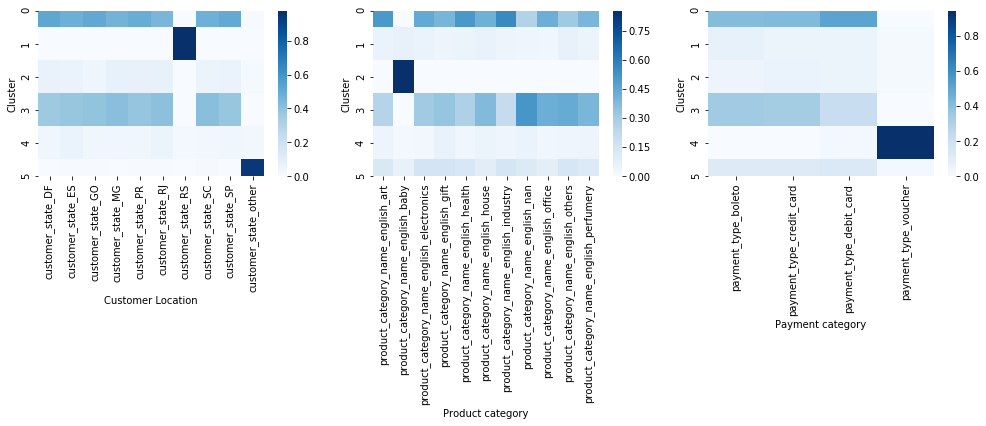

In [32]:
#Category and location visualisation
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Visualisation with Heatmap
g1 = sns.heatmap(df1,ax=ax1,cmap="Blues")
g1.set_xlabel('Customer Location')
g1.set_ylabel('Cluster')

g2 = sns.heatmap(df2, ax=ax2,cmap="Blues")
g2.set_xlabel('Product category')
g2.set_ylabel('Cluster')

g3 = sns.heatmap(df3, ax=ax3,cmap="Blues")
g3.set_xlabel('Payment category')
g3.set_ylabel('Cluster')

plt.tight_layout(pad=1)

**Numerical features**

In [33]:
customer_exp = ['order_delivery_time', 'order_estimated_delivery_time','order_estimated_delivery_vs_actual','nb_orders','nb_days_last_order','total_money','review_score','distance','payment_sequential', 'payment_installments']

In [34]:
# #Plot cluster information with OUTLIERS
# fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for i,feat in enumerate(customer_exp):
#     ax = fig.add_subplot(3, 4, i+1)
#     sns.boxplot(x="cluster", y=feat, data=X,showmeans=True)

# plt.tight_layout()

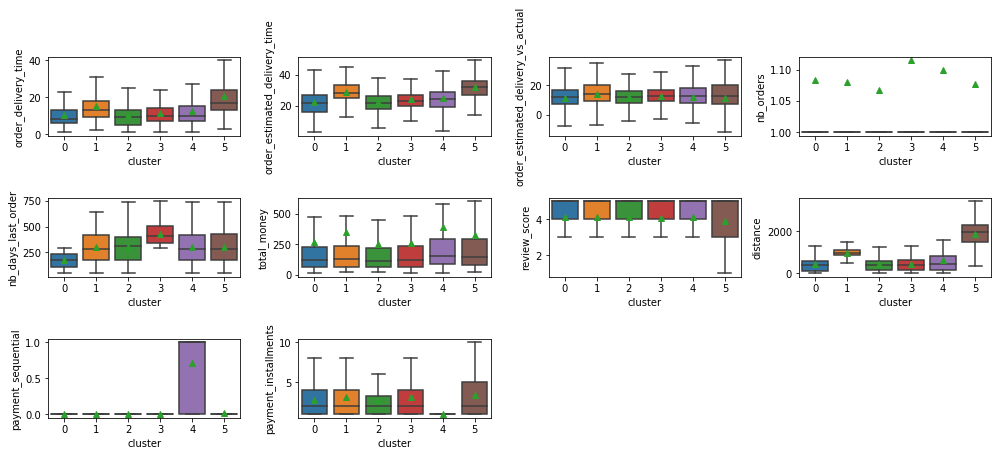

In [35]:
#Plot cluster information WITHOUT OUTLIERS
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i,feat in enumerate(customer_exp):
    ax = fig.add_subplot(4, 4, i+1)
    sns.boxplot(x="cluster", y=feat, data=X,showmeans=True,showfliers=False)
plt.tight_layout(pad=1.2)

With the above graphs, we can now have a better understanding of our 7 clusters. 

### Random Forest

From this study, it seems that the following features enable us to describe each cluster: customer location, product category, payment type, distance between customer and seller. We will also conduct a random forest, with the cluster being the output, in order to determine which features have the higher variance regarding our clustering.  
The following graph highlights the features with the most variance, we can see that the features represented are the same as the one we had by doing an univariate analysis.

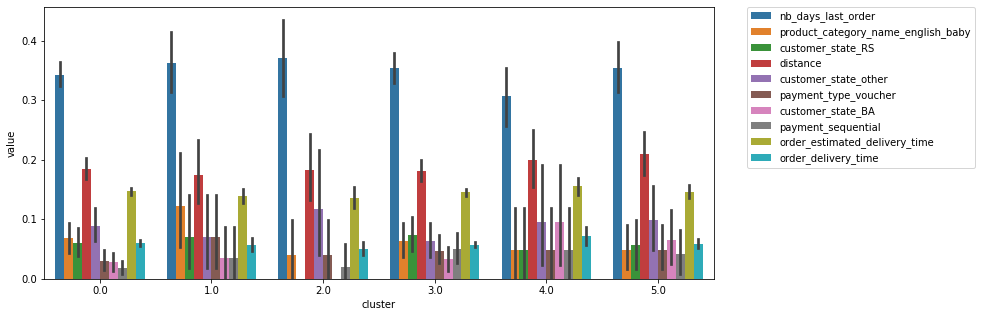

In [36]:
#Random forest analysis
from sklearn.ensemble import RandomForestClassifier

#Dataset
X_rf = X.iloc[:,:40].copy()
X_rf['cluster'] = X['cluster']
Xrf, yrf = X_rf.iloc[:,:-1], X_rf.iloc[:,-1]

clf = RandomForestClassifier(n_estimators=100).fit(Xrf, yrf)
#Get the features importance

data = np.array([clf.feature_importances_, Xrf.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(10).Feature.values)

#Vizualisation
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(Xrf.copy()))
df_scaled.columns = Xrf.columns
df_scaled['cluster'] = X['cluster']

tidy = df_scaled[columns+['cluster']].melt(id_vars='cluster')

#Plot 7 best features importance
fig = plt.figure(figsize=(12,5))
g = sns.barplot(x='cluster', y='value', hue='variable', data=tidy)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

If we are to use the feature importance from the RFC, we should ensure that we are able to have a good prediction on the cluster and so study the accuracy of our prediction, with the confusion matrix for instance. However, we will not do it for this project.

## RFM

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.  

We will create those 3 features for each customer.

In [37]:
rfm = df[['nb_days_last_order', 'nb_orders', 'total_money']]
rfm.columns = ['recency','frequency','money']

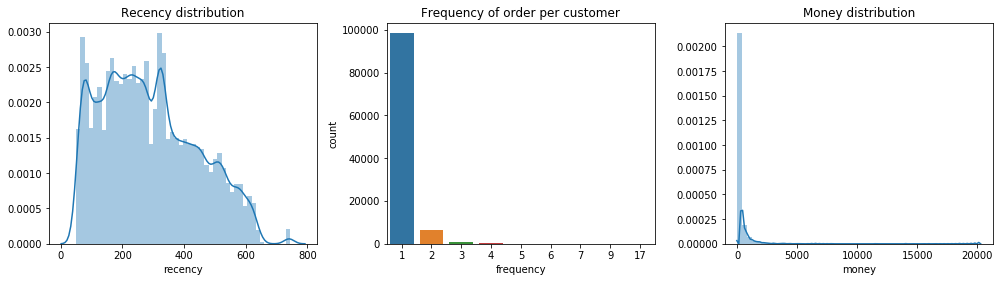

In [38]:
#RFM distribution
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(rfm['frequency'],ax=ax2)
ax2.set_title('Frequency of order per customer')

g1 = sns.distplot(rfm['recency'],ax=ax1)
ax1.set_title('Recency distribution')

sns.distplot(rfm['money'],ax=ax3)
ax3.set_title('Money distribution')
plt.tight_layout(pad=1.0)

### Scoring

In [39]:
#Get quantile & Scoring
q_25 = []
q_50 = []
q_75 = []

for i in rfm.columns:
    q_25.append(rfm[i].quantile(q=0.25))
    q_50.append(rfm[i].quantile(q=0.50))
    q_75.append(rfm[i].quantile(q=0.75))

def get_score_asc(q1,q2,q3,x):
    if x<q1:
        return 1
    if q1<=x<q2:
        return 2
    if q2<=x<q3:
        return 3
    if q3<=x:
        return 4

def get_score_desc(q1,q2,q3,x):
    if x<q1:
        return 4
    if q1<=x<q2:
        return 3
    if q2<=x<q3:
        return 2
    if q3<=x:
        return 1

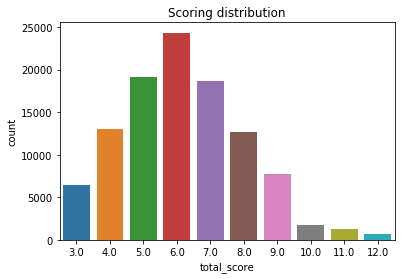

In [40]:
#Remove warning
pd.options.mode.chained_assignment = None

#Apply scoring for each customer
rfm['recency_score'] = rfm['recency'].apply(lambda x: get_score_desc(q_25[0],q_50[0],q_75[0],x))
rfm['frequency_score'] = rfm['frequency'].apply(lambda x: 1 if x==1 else (2 if x==3 else 4))
rfm['money_score'] = rfm['money'].apply(lambda x: get_score_asc(q_25[2],q_50[2],q_75[2],x))
rfm['total_score'] = rfm.apply(lambda row: row['recency_score']+row['frequency_score']+row['money_score'],axis=1)

#Plot result
g = sns.countplot(rfm['total_score'])
g.set_title('Scoring distribution')
plt.show()

In [41]:
#Take only a sample
N = 5000
#Get the same randomize selection
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
idx_random = rndperm[:N]

#Scale for future comparaison and only take a sample for K-means later on
X_rfm = rfm[['recency','frequency','money']].iloc[idx_random,:].copy()
standard_scaler = preprocessing.MinMaxScaler()
X_rfm_std = standard_scaler.fit_transform(X_rfm)
X_rfm_std = pd.DataFrame(X_rfm_std)
X_rfm_std.columns = rfm.columns[:3]
X_rfm_std['total_score'] = rfm['total_score'].loc[idx_random].copy().reset_index(drop=True)

#Plot scaled rfm with new segment
fig = px.scatter_3d(X_rfm_std.reset_index(), x='recency', y='frequency',z='money',
                   color='total_score',labels={'color':'total_score'})
fig.update_layout(title="RFM with scoring")
fig.show()

**Segments Definition**
As explained earlier, RFM uses three variables: Recency, Frequency, Monetary Value in order to segment the Customer Base.. I segmented the dataset as follows:

- Inactive: customers with no orders in the last two years
- Cold: no orders in the last year, with at least one order in the last two years
- Warm: last purchase between six months and one year ago
- Active High Value: at least one purchase in the last six months, average order value below the overall average, more than one order overall
- Active Low Value: at least one purchase in the last six months, and average order value below the overall average, more than one order overall
- New: first and unique purchase made in the last six months

In [42]:
# segmentation
avg_purchase=rfm['money'].mean()
rfm['segment'] = np.nan 
rfm.loc[rfm['recency']>365*2, 'segment']= 'inactive'
rfm.loc[(rfm['recency']<=365*2) & (rfm['recency']>365), 'segment'] = 'cold'
rfm.loc[(rfm['recency']<=365) & (rfm['recency']>365/2), 'segment'] = 'warm'
rfm.loc[(rfm['recency']<=365/2) & (rfm['money']>=avg_purchase), 'segment'] = 'active high value'
rfm.loc[(rfm['recency']<=365/2) & (rfm['money']<avg_purchase), 'segment'] = 'active low value'
#OVERWRITE SOME OF THE PREVIOUS 'ACTIVE LOW/HI VALUE"
rfm.loc[(rfm['recency']<=365/2) & (rfm['frequency']==1), 'segment'] = 'new'

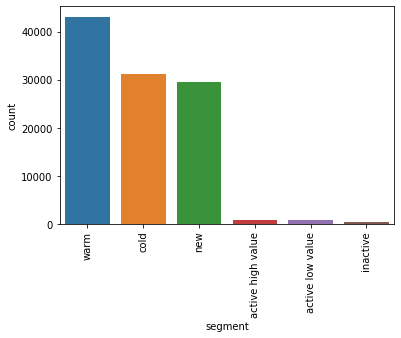

In [43]:
#Plot distribution
g = sns.countplot(x='segment',data=rfm,order=rfm['segment'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

In [44]:
#Plot scaled rfm with new segment
X_rfm_std['segment'] = rfm['segment'].loc[idx_random].copy().reset_index(drop=True)

fig = px.scatter_3d(X_rfm_std.reset_index(), x='recency', y='frequency',z='money',
                   color='segment',labels={'color':'segment'})
fig.update_layout(title="RFM with segment")
fig.show()

### Clustering

We will compare the result found with the RFM segmentation with those coming from a clustering algorithm (CAH). We will take 6 clusters (as we have 6 above) in order to compare the results.

In [45]:
# #CAH study
# silhouettes = []
# for num_cluster in range(2, 10):
#     cls = AgglomerativeClustering(n_clusters=num_cluster)
#     cls.fit(X_rfm_std[['recency', 'frequency', 'money']])
#     silh = metrics.silhouette_score(X_rfm_std[['recency', 'frequency', 'money']], cls.labels_)
#     silhouettes.append(silh)

# plt.plot(range(2,10),silhouettes)
# plt.show()

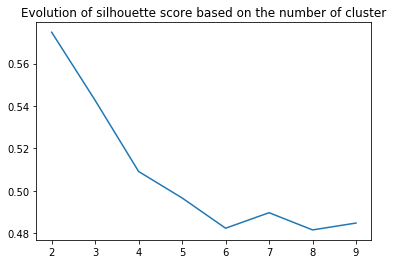

In [46]:
#K means study
silhouettes = []
for num_cluster in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_cluster, n_init=10,init='k-means++')
    cls.fit(X_rfm_std[['recency', 'frequency', 'money']])
    silh = metrics.silhouette_score(X_rfm_std[['recency', 'frequency', 'money']], cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10),silhouettes)
plt.title("Evolution of silhouette score based on the number of cluster")
plt.show()

In [47]:
#Get better cluster number
# cah = AgglomerativeClustering(n_clusters=6)
# cah.fit(X_rfm_std)
km = cluster.KMeans(n_clusters=6)
km.fit(X_rfm_std[['recency', 'frequency', 'money']])

X_rfm_std['cluster'] = km.labels_

In [48]:
fig = px.scatter_3d(X_rfm_std.reset_index(), x='recency', y='frequency',z='money',
                   color='cluster',labels={'color':'cluster'})
fig.update_layout(title="RFM with clusters")
fig.show()

The above graph is very similar to the segmentation we have previously done.

In [49]:
transform = {}
#Convert into numbers
for i,v in enumerate(X_rfm_std['segment'].unique()):
    transform[v] = i
X_rfm_std['segment_numbers'] = X_rfm_std['segment'].replace(transform)

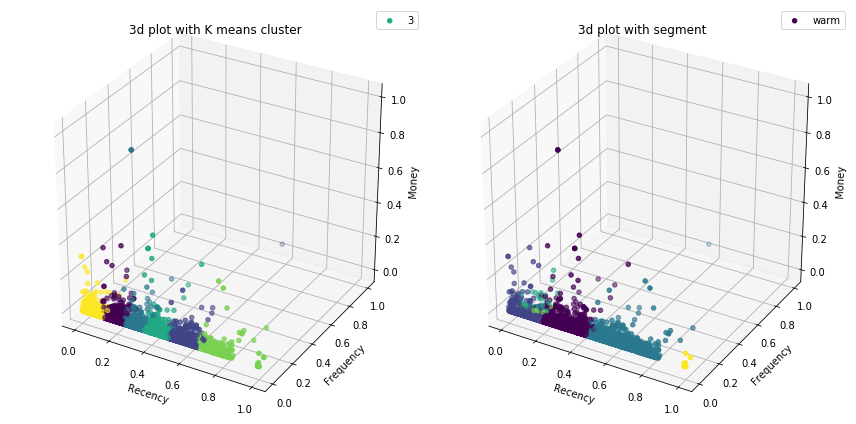

In [50]:
#Compare clustering with scoring
fig = plt.figure(figsize=(12,6))
from mpl_toolkits.mplot3d import Axes3D
X_rfm_std['segment'] = rfm['segment'].loc[idx_random].reset_index(drop=True)

ax1 = fig.add_subplot(1,2,1,projection='3d')
ax2 = fig.add_subplot(1,2,2,projection='3d')

# ax1 = Axes3D(fig)
# ax2 = Axes3D(fig)

ax1.scatter(xs=X_rfm_std['recency'], ys=X_rfm_std['frequency'],zs=X_rfm_std['money'], c=X_rfm_std['cluster'])
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Money')
ax1.legend(labels=X_rfm_std['cluster'])
ax1.set_title('3d plot with K means cluster')

ax2.scatter(xs=X_rfm_std['recency'], ys=X_rfm_std['frequency'],zs=X_rfm_std['money'], c=X_rfm_std['segment_numbers'])
ax2.set_xlabel('Recency')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Money')
ax2.legend(X_rfm_std['segment'])
ax2.set_title('3d plot with segment')

plt.tight_layout()

In [51]:
#Difference between clusters and segment
print(f"Adjusted rand score between clusters and segmentation: {metrics.adjusted_rand_score(X_rfm_std['segment_numbers'],X_rfm_std['cluster']):.2f}")

Adjusted rand score between clusters and segmentation: 0.41


## Cluster stability throughout time

### Study of dataset for the six first months of 2017 and 2018
We will study the cluster stability between the year 2017 and 2018 for the six first months since we only have data for 2018 up until august.

In [52]:
#Random sample
N = 5000
X1 = df_17[df_17.month<=6].sample(N, random_state=42).copy()
X2 = df_18[df_18.month<=6].sample(N, random_state=42).copy()

#Scaling
scaler = preprocessing.StandardScaler()
X1_std = pd.DataFrame(scaler.fit_transform(X1))
X1_std.columns = X1.columns
X1_std.year = 2017

X2_std = pd.DataFrame(scaler.fit_transform(X2))
X2_std.columns = X2.columns
X2_std.year = 2018

In [53]:
#Concat two df
frames_std = [X1_std,X2_std]
X = pd.concat(frames_std).reset_index(drop=True)
X.drop(columns=['month'],inplace=True)

#T-sne 
tsne = manifold.TSNE(n_components=2, perplexity=35, n_iter=500, init='pca',random_state=42)
X_tsne = tsne.fit_transform(X)

X['tsne-2d-one'] = X_tsne[:,0]
X['tsne-2d-two'] = X_tsne[:,1]

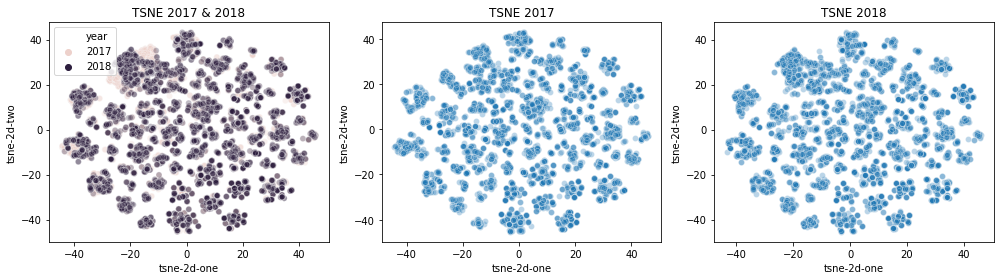

In [54]:
#Compare 2017 and 2018 dataset
plt.figure(figsize=(14,4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    hue="year",
    alpha=0.3,
    ax=ax1
)
ax1.set_title('TSNE 2017 & 2018')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X[X.year==2017],
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax2.set_title('TSNE 2017')

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X[X.year==2018],
    legend="full",
    alpha=0.3,
    ax=ax3
)
ax3.set_title('TSNE 2018')

plt.tight_layout()

It seems that from the above graph that the dataset 2017 and 2018 are very similar. When we apply a K-means algorithm to identify clusters for the X dataframe, which regroup the data from the 6 first months of 2017 & 2018, the silhouette score is three times higher than the one obtains earlier (cf 3.2). Plus, when we look at the vizualisation bellow, the clusters are now more separeted.

In [55]:
#Get better cluster number
km1 = cluster.KMeans(n_clusters=7)
km1.fit(X)
X['cluster'] = km1.labels_
print(f"Silhouette score: {metrics.silhouette_score(X,km1.labels_)}")

Silhouette score: 0.34796868765156963


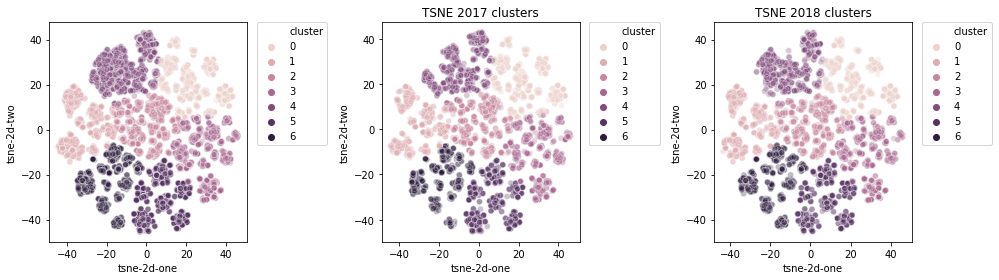

In [56]:
#Compare results
plt.figure(figsize=(14,4))

#Vizualisation of the dataset
ax = plt.subplot(1,3,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X,
    legend="full",
    hue="cluster",
    alpha=0.3,
    ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Compare Tsne 2017 - 2018
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X[X.year==2017],
    legend="full",
    hue='cluster',
    alpha=0.3,
    ax=ax2
)
ax2.set_title('TSNE 2017 clusters')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=X[X.year==2018],
    legend="full",
    hue='cluster',
    alpha=0.3,
    ax=ax3
)
ax3.set_title('TSNE 2018 clusters')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

In [57]:
#For univariate analysis visualisation, we want the actual values of each features
frames = [X1,X2]
X_notscaled = pd.concat(frames).reset_index(drop=True)
X_notscaled['cluster'] = X['cluster']

### Clusters interpretation for 2017

In [58]:
#Get the values of 6 first months univariate analysis of 2018

#Customer location
df1 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2017]['cluster'].nunique())]),columns=['cluster'])
#Get the location distribution within the different cluster
for i in location:
    df1[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum().sum()
df1.drop(columns=['cluster'],inplace=True)

#Product category
df2 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2017]['cluster'].nunique())]),columns=['cluster'])
#Get the category distribution within the different cluster
for i in product:
    df2[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum().sum()
df2.drop(columns=['cluster'],inplace=True)

#Payment method
df3 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2017]['cluster'].nunique())]),columns=['cluster'])
#Get the payment distribution within the different cluster
for i in payment:
    df3[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2017].groupby('cluster')[i].sum().sum()
df3.drop(columns=['cluster'],inplace=True)

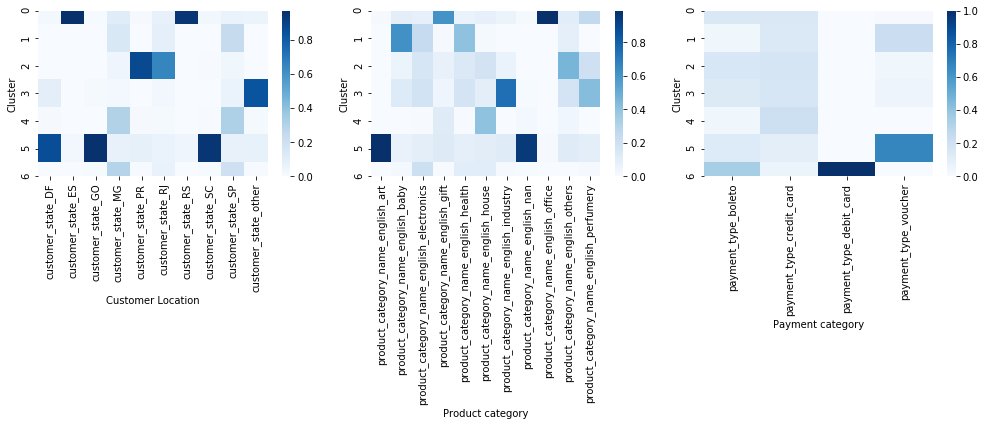

In [59]:
#Category and location visualisation
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Visualisation with Heatmap
g1 = sns.heatmap(df1,ax=ax1,cmap="Blues")
g1.set_xlabel('Customer Location')
g1.set_ylabel('Cluster')

g2 = sns.heatmap(df2, ax=ax2,cmap="Blues")
g2.set_xlabel('Product category')
g2.set_ylabel('Cluster')

g3 = sns.heatmap(df3, ax=ax3,cmap="Blues")
g3.set_xlabel('Payment category')
g3.set_ylabel('Cluster')

plt.tight_layout(pad=1)

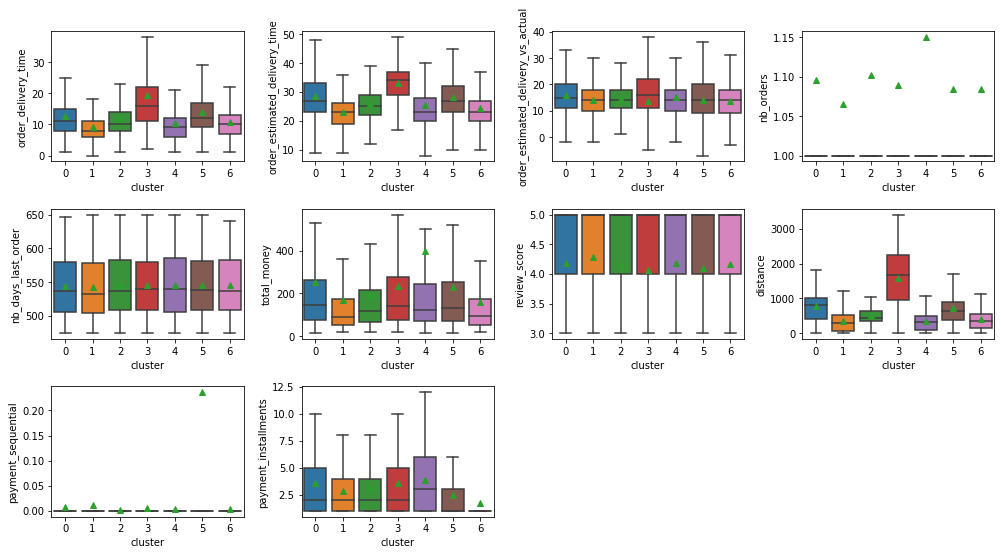

In [60]:
#Plot cluster information WITHOUT OUTLIERS
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i,feat in enumerate(customer_exp):
    ax = fig.add_subplot(3, 4, i+1)
    sns.boxplot(x="cluster", y=feat, data=X_notscaled[X_notscaled.year==2017],showmeans=True,showfliers=False)
plt.tight_layout(pad=1.2)

### Clusters interpretation for 2018

In [61]:
#Get the values of 6 first months univariate analysis of 2018

#Customer location
df1 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2018]['cluster'].nunique())]),columns=['cluster'])
#Get the location distribution within the different cluster
for i in location:
    df1[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum().sum()
df1.drop(columns=['cluster'],inplace=True)

#Product category
df2 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2018]['cluster'].nunique())]),columns=['cluster'])
#Get the category distribution within the different cluster
for i in product:
    df2[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum().sum()
df2.drop(columns=['cluster'],inplace=True)

#Payment method
df3 = pd.DataFrame(data=np.array([i for i in range(0,X_notscaled[X_notscaled.year==2018]['cluster'].nunique())]),columns=['cluster'])
#Get the payment distribution within the different cluster
for i in payment:
    df3[i] = pd.DataFrame(X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum()).reset_index(drop=True)/X_notscaled[X_notscaled.year==2018].groupby('cluster')[i].sum().sum()
df3.drop(columns=['cluster'],inplace=True)

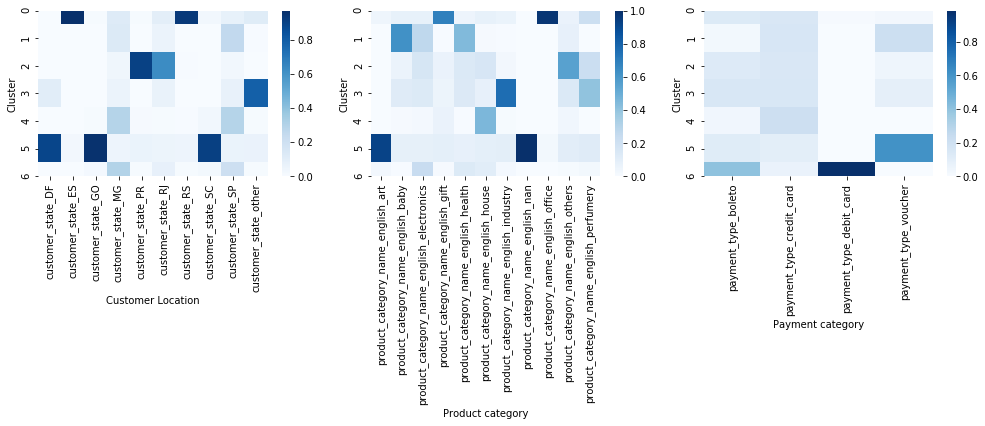

In [62]:
#Category and location visualisation
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Visualisation with Heatmap
g1 = sns.heatmap(df1,ax=ax1,cmap="Blues")
g1.set_xlabel('Customer Location')
g1.set_ylabel('Cluster')

g2 = sns.heatmap(df2, ax=ax2,cmap="Blues")
g2.set_xlabel('Product category')
g2.set_ylabel('Cluster')

g3 = sns.heatmap(df3, ax=ax3,cmap="Blues")
g3.set_xlabel('Payment category')
g3.set_ylabel('Cluster')

plt.tight_layout(pad=1)

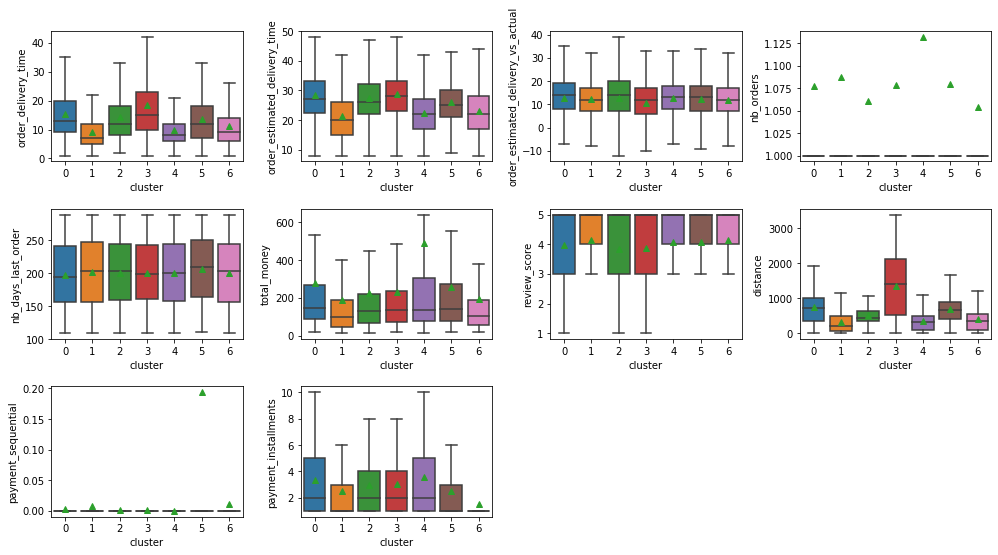

In [63]:
#Plot cluster information WITHOUT OUTLIERS
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i,feat in enumerate(customer_exp):
    ax = fig.add_subplot(3, 4, i+1)
    sns.boxplot(x="cluster", y=feat, data=X_notscaled[X_notscaled.year==2018],showmeans=True,showfliers=False)
plt.tight_layout(pad=1.2)

## Conclusion

Segmentation comparasion:
- RFM:
    - ++: easy to understand, no need for a heavy computational
    - --: Use only 3 features, for this dataset, lots of unique command
- Clustering with all features: 
    - ++: use every features
    - --: Computationaly heavy
    
Stability of clusters throughout the time:
- We can see that the clusters obtained from 2017 and 2018 datasets are very similar and we have the seasonality effect we suspected